# Laboratory #02 : Image Operators and Filters

At the end of this laboratory, you would get familiarized with

*   Image Handling
*   Image Manipulation
*   Histogram and Histogram Equalization
*   Basic filtering techniques
---


In [2]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)
from PIL import Image, ImageDraw
import numpy as np
from numpy import asarray
from matplotlib import pyplot as plt
from skimage import data, exposure, filters, io, morphology
from matplotlib import pyplot

# Channels and color spaces

### **Exercise: Image Creation and Color Manipulation**

*   Create a 100 x 100 image for each of the below visualization

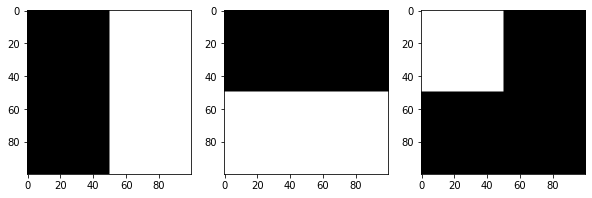

*   Visualize the created images in a 1 x 3 subplot using matplotlib.


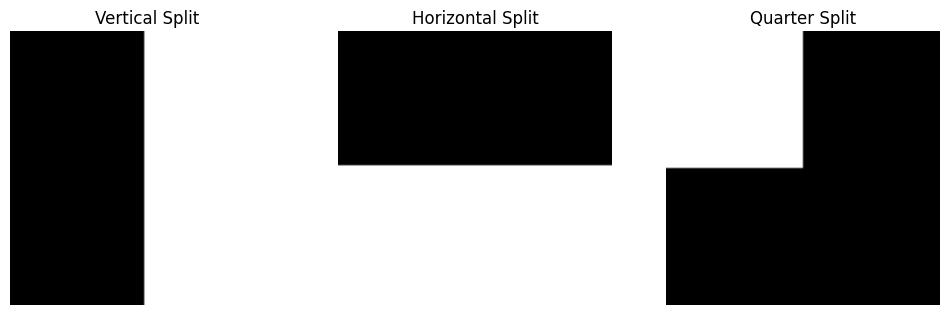

In [3]:
def create_image(pattern):
    image = Image.new('1', (100, 100), 0)  # Create a black image
    draw = ImageDraw.Draw(image)
    
    if pattern == 'vertical':
        draw.rectangle([49, 0, 99, 99], fill=1)  # Draw a white rectangle on the left half
    elif pattern == 'horizontal':
        draw.rectangle([0, 49, 99, 99], fill=1)  # Draw a white rectangle on the top half
    elif pattern == 'quarter':
        draw.rectangle([0, 0, 49, 49], fill=1)  # Draw a white rectangle on the top-left quarter
    return image
# Create images with different patterns
image1 = create_image('vertical')
image2 = create_image('horizontal')
image3 = create_image('quarter')
# Display images using matplotlib
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for ax, img, title in zip(axes, [image1, image2, image3], ['Vertical Split', 'Horizontal Split', 'Quarter Split']):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.axis('off')
plt.show()

*   Use the above three images to create the following image

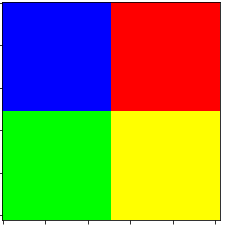

*Hint: Remember channels and color spaces*

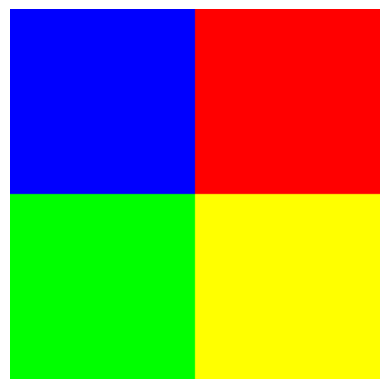

In [4]:
def create_colored_image(color):
    image = Image.new('RGB', (100, 100), color)  # Create a 100x100 image with the specified color
    return image
# Colors for each pattern
colors = {
    'blue': (0, 0, 255),      # Blue
    'red': (255, 0, 0),       # Red
    'green': (0, 255, 0),     # Green
    'yellow': (255, 255, 0)   # Yellow
}
# Create colored images
blue_image = create_colored_image(colors['blue'])
red_image = create_colored_image(colors['red'])
green_image = create_colored_image(colors['green'])
yellow_image = create_colored_image(colors['yellow'])
# Create the final 200x200 image
final_image = Image.new('RGB', (200, 200), 'white')  # Start with white background
# Paste the images in the correct quadrants
final_image.paste(blue_image, (0, 0))    # Top-left
final_image.paste(red_image, (100, 0))   # Top-right
final_image.paste(green_image, (0, 100)) # Bottom-left
final_image.paste(yellow_image, (100, 100)) # Bottom-right
# Display the final image using matplotlib
plt.imshow(final_image)
plt.axis('off')
plt.show()



### **Exercise: Color Manipulation**

*   Read the image 'sillas.jpg' from the images folder

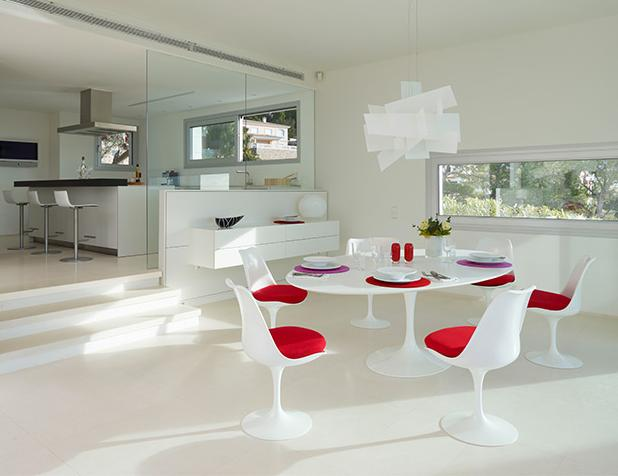

*   Extract individual channels and plot them using matplotlib subplot.



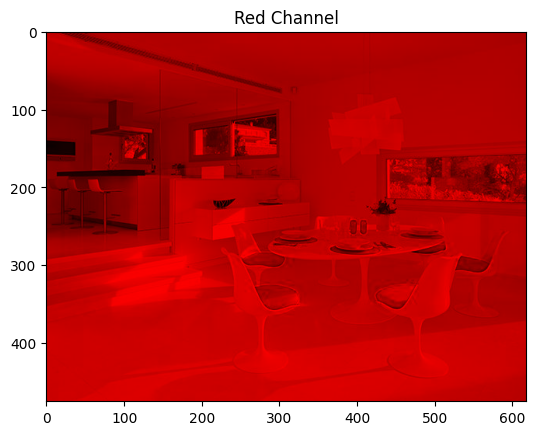

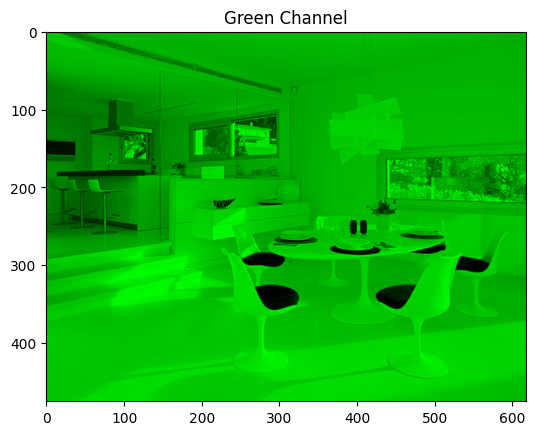

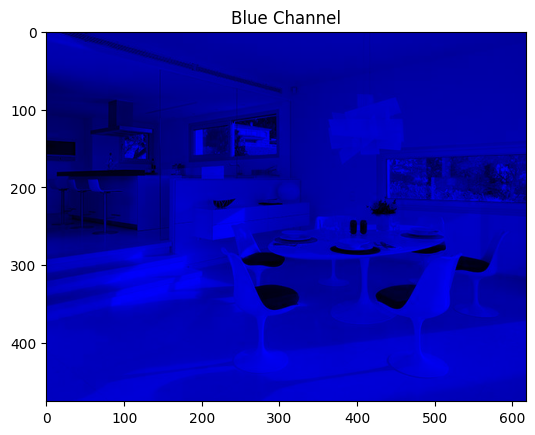

In [5]:
# load the image
image = Image.open('images/sillas.jpg')

# convert image to numpy array
data = asarray(image)


# Create images for each channel
red_channel = data.copy()
red_channel[:, :, 1] = 0  # Zero out green channel
red_channel[:, :, 2] = 0  # Zero out blue channel

green_channel = data.copy()
green_channel[:, :, 0] = 0  # Zero out red channel
green_channel[:, :, 2] = 0  # Zero out blue channel

blue_channel = data.copy()
blue_channel[:, :, 0] = 0  # Zero out red channel
blue_channel[:, :, 1] = 0  # Zero out green channel

# Display the red channel
plt.imshow(red_channel)
plt.title("Red Channel")
plt.show()

# Display the green channel
plt.imshow(green_channel)
plt.title("Green Channel")
plt.show()

# Display the blue channel
plt.imshow(blue_channel)
plt.title("Blue Channel")
plt.show()

*   The color **red** looks too bright for the eyes. Isn't it?? Lets change the color and see how it appears.
    *    Create a new image where everything that is **'red' is changed to 'blue'**.
*   Visualize the original image and the created image using matplotlib subplot.

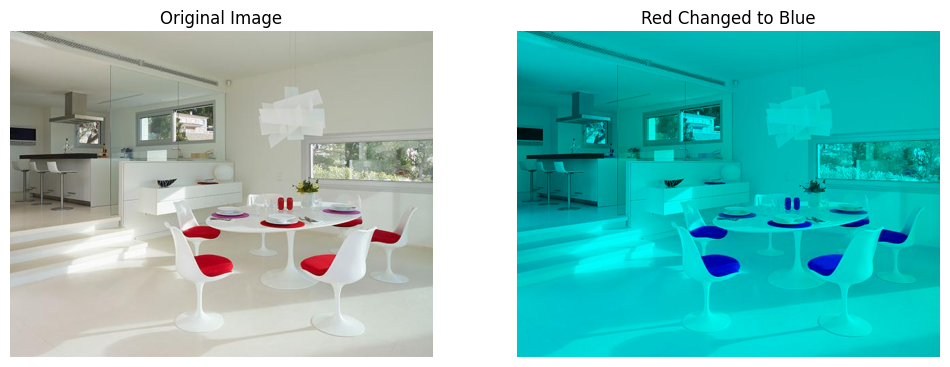

In [6]:
# Create a copy of the image data
new_data = data.copy()

# Change all red pixels to blue
new_data[:, :, 2] = new_data[:, :, 0]  # Set blue channel to the value of the red channel
new_data[:, :, 0] = 0  # Set red channel to 0

# Visualize the original image and the created image
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(data)
ax[0].set_title("Original Image")
ax[0].axis('off')

ax[1].imshow(new_data)
ax[1].set_title("Red Changed to Blue")
ax[1].axis('off')

plt.show()



# Image Manipulation

### **Exercise: Image Operators**

*   You can find images 'model.png' and 'coat.png' in the images folder (First two images of the below visualization). Your task is to create an image from the given two images such a way that the model is wearing the coat (Third image in the visualization).
*   You can also find different textures in the images folder. Your task is to change the coat texture to any one of the given textures.
*   Visualize the images similar to the given visualization.

*Hint: Think masks!!!*

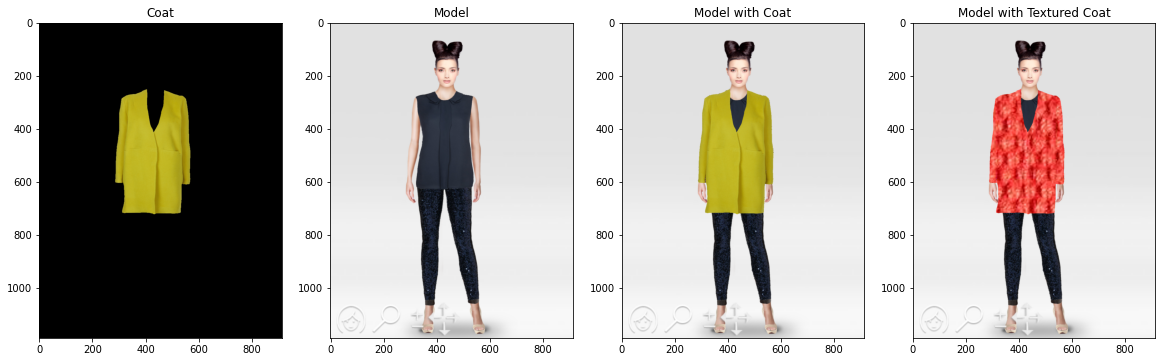

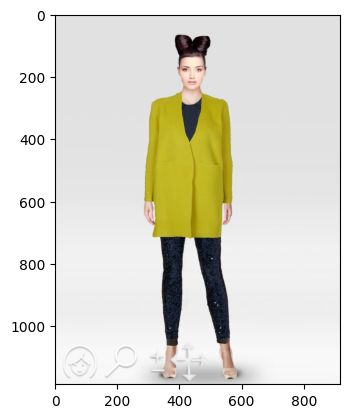

In [7]:
# Load the base image
base_image = Image.open('images/model.png')

# Load the overlay image
overlay_image = Image.open('images/coat.png')

# Convert black background to transparency
data = overlay_image.getdata()

new_data = []
for item in data:
    # Change all black (also shades of black)
    # to transparent
    if item[:3] == (0, 0, 0):
        new_data.append((255, 255, 255, 0))
    else:
        new_data.append(item)

overlay_image.putdata(new_data)

# Paste the overlay image on top of the base image
# The fourth parameter is the mask which allows for transparency
base_image.paste(overlay_image, overlay_image)

# Display result
pyplot.imshow(base_image)
pyplot.show()

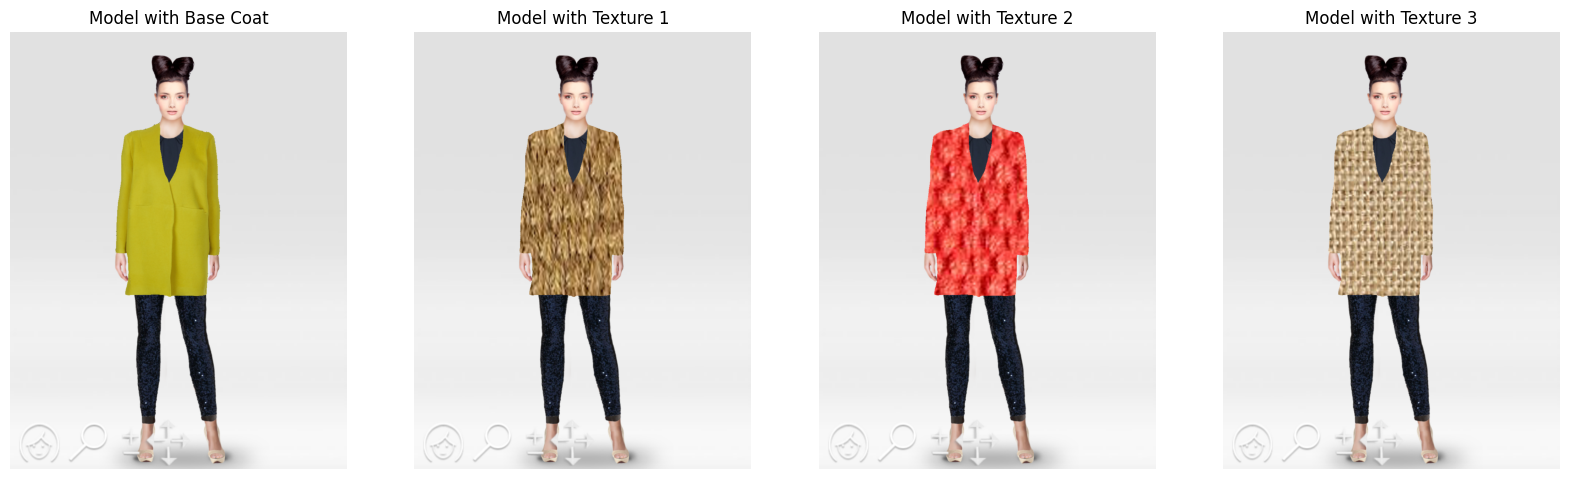

In [8]:
# Load images
model = Image.open('images/model.png').convert("RGBA")
coat = Image.open('images/coat.png').convert("RGBA")
texture1 = Image.open('images/texture.png').convert("RGBA")
texture2 = Image.open('images/texture2.png').convert("RGBA")
texture3 = Image.open('images/texture3.jpg').convert("RGBA")

# Function to change black background to transparency
def make_transparent(image):
    data = image.getdata()
    new_data = []
    for item in data:
        if item[:3] == (0, 0, 0):
            new_data.append((255, 255, 255, 0))
        else:
            new_data.append(item)
    image.putdata(new_data)
    return image

# Apply transparency to the coat
coat = make_transparent(coat)

# Paste the coat onto the model
model_with_coat = model.copy()
model_with_coat.paste(coat, (0, 0), coat)

# Function to apply texture to the coat
def apply_texture(base, texture):
    texture = texture.resize(coat.size)
    textured_coat = coat.copy()
    textured_coat.paste(texture, (0, 0), coat)
    result = base.copy()
    result.paste(textured_coat, (0, 0), textured_coat)
    return result

# Apply textures to the coat and create images
model_with_texture1 = apply_texture(model, texture1)
model_with_texture2 = apply_texture(model, texture2)
model_with_texture3 = apply_texture(model, texture3)

# Visualize the images
fig, axes = plt.subplots(1, 4, figsize=(20, 10))

axes[0].imshow(model_with_coat)
axes[0].set_title("Model with Base Coat")
axes[0].axis('off')

axes[1].imshow(model_with_texture1)
axes[1].set_title("Model with Texture 1")
axes[1].axis('off')

axes[2].imshow(model_with_texture2)
axes[2].set_title("Model with Texture 2")
axes[2].axis('off')

axes[3].imshow(model_with_texture3)
axes[3].set_title("Model with Texture 3")
axes[3].axis('off')

plt.show()


# Contrast Enhancement

### **Exercise: Histogram Computation**

*   Read the **'astronaut' image** from data module.
*   Convert the image to grayscale.
*   Compute the **histogram of the image.** *Hint: histogram function is available in skimage.exposure package*
*   Plot the histogram using matplotlib plot.




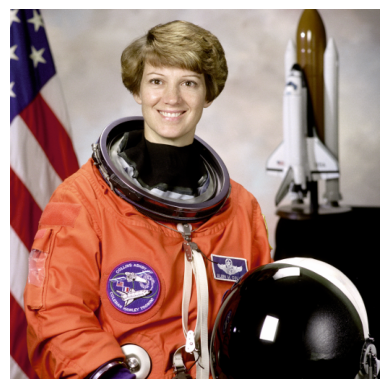

In [9]:
from skimage import data, color, exposure
# Step 1: Read the 'astronaut' image from the data module
image = data.astronaut()
plt.imshow(image) 
plt.axis('off') # Hide the axis 
plt.show()

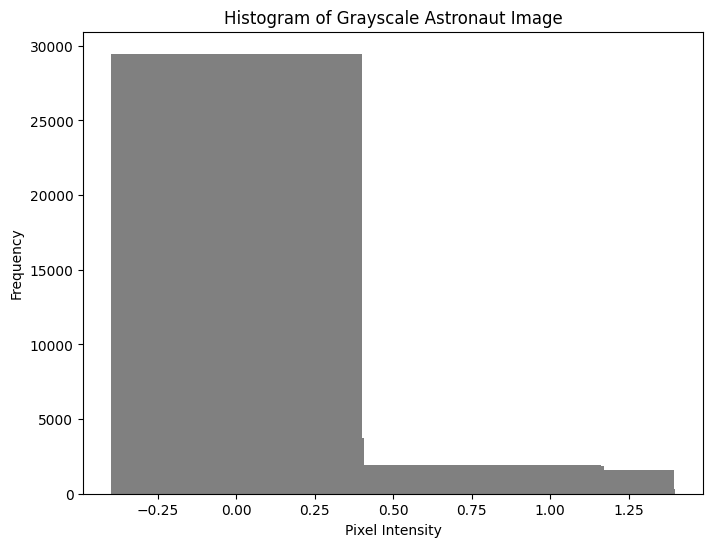

In [17]:
# Step 2: Convert the image to grayscale
gray_image = color.rgb2gray(image)
# Step 3: Compute the histogram of the image
histogram, bins = exposure.histogram(gray_image)
# Step 4: Plot the histogram using matplotlib
plt.figure(figsize=(8, 6))
plt.bar(bins, histogram, width=0.8, color='gray')
plt.title('Histogram of Grayscale Astronaut Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

*   Change the bin count to 8 and compute the histogram of the image and plot the computed histogram using matplotlib plot.

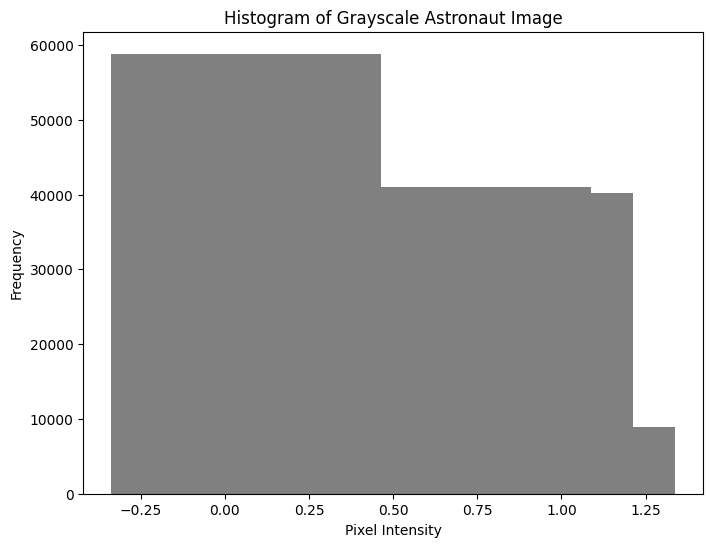

In [20]:
# Step 2: Convert the image to grayscale
gray_image = color.rgb2gray(image)
# Step 3: Compute the histogram of the image
histogram, bins = exposure.histogram(gray_image, nbins = 8 )
# Step 4: Plot the histogram using matplotlib
plt.figure(figsize=(8, 6))
plt.bar(bins, histogram, width=0.8, color='gray')
plt.title('Histogram of Grayscale Astronaut Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

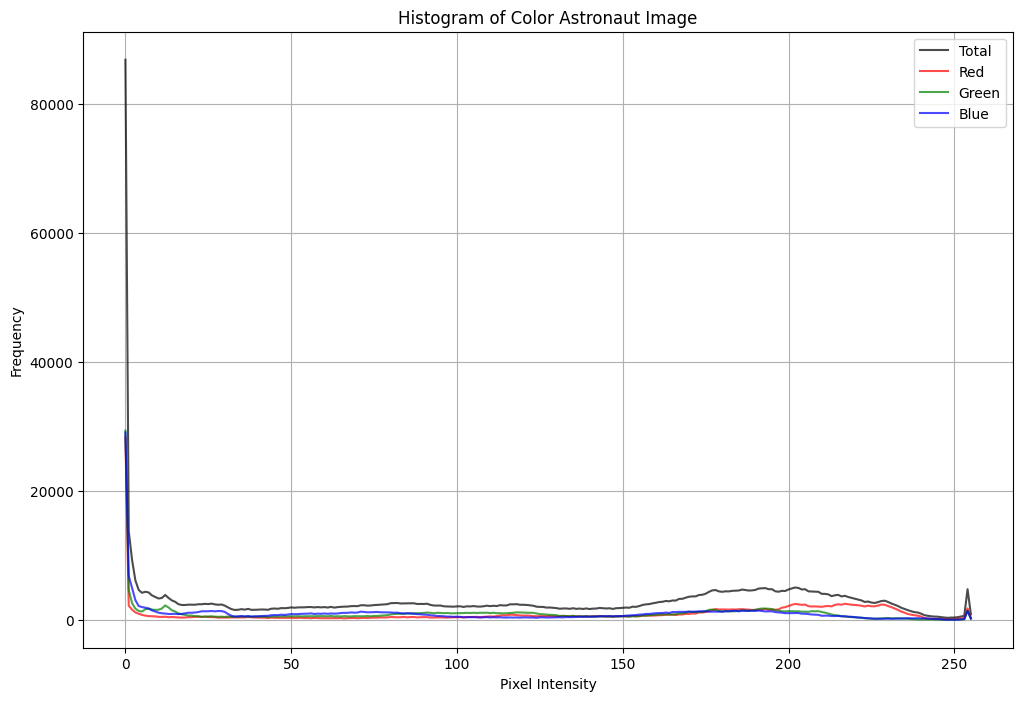

In [13]:
# Step 1: Read the 'astronaut' image from the data module
image = data.astronaut()

# Step 2: Compute the histogram of the color image
hist_total, bins_total = exposure.histogram(image.ravel(), nbins=256)

# Step 3: Compute the histogram for each color channel (RGB)
hist_red, bins_red = exposure.histogram(image[:,:,0].ravel(), nbins=256)
hist_green, bins_green = exposure.histogram(image[:,:,1].ravel(), nbins=256)
hist_blue, bins_blue = exposure.histogram(image[:,:,2].ravel(), nbins=256)

# Step 4: Plot the total histogram and histograms for each channel
plt.figure(figsize=(12, 8))

# Plot total histogram
plt.plot(bins_total, hist_total, color='black', label='Total', alpha=0.7)

# Plot histograms for each channel (RGB)
plt.plot(bins_red, hist_red, color='red', label='Red', alpha=0.7)
plt.plot(bins_green, hist_green, color='green', label='Green', alpha=0.7)
plt.plot(bins_blue, hist_blue, color='blue', label='Blue', alpha=0.7)

plt.title('Histogram of Color Astronaut Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()



*   What happens when you change the bin count? Does your inference change based on the bin count? If yes, then how do you define the correct bin count.
*   What happens when the bin count is very low and what happens when it is very high?



**Solution**

When we change the bin count, we increase the granularity of the pixel intensity and probably the number of features.
Yes, the inference will change based on the bin count since we increase or decrease the number of features.
Defining the correct bin count can be done by testing different hyperparameters and keeping the one that performs the best with our model.
When the bin count is very low, the model will struggle to differenciate between different parts of the image.
When the bin count is too high, the model will have too many areas to look at and will lose performance.
Finding a sweet spot is needed.

...


*   Compute histogram of the color image (without converting it to grayscale).
*   Plot the total histogram and also histogram for each channel (show it in a single plot with differnt legends for each histogram).


C:\Users\drago\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\skimage\_shared\utils.py:438: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


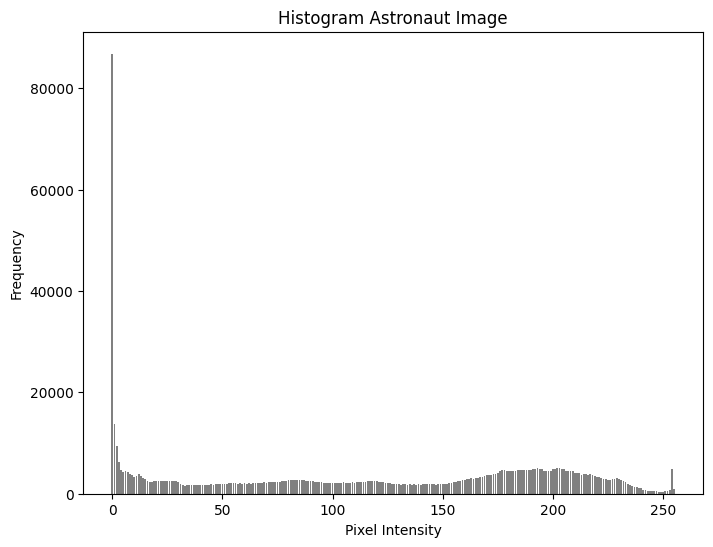

In [22]:
image = data.astronaut()
# Compute the histogram of the image
histogram, bins = exposure.histogram(image, nbins = 8 )
# Plot the histogram using matplotlib
plt.figure(figsize=(8, 6))
plt.bar(bins, histogram, width=0.8, color='gray')
plt.title('Histogram Astronaut Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

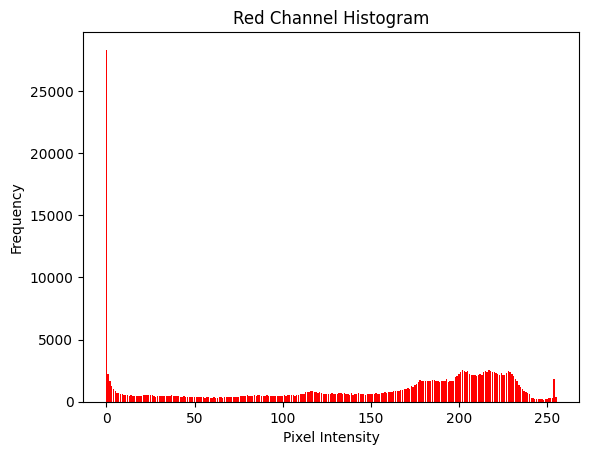

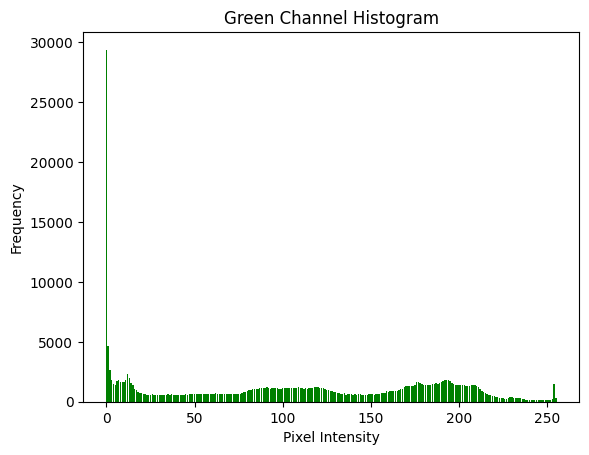

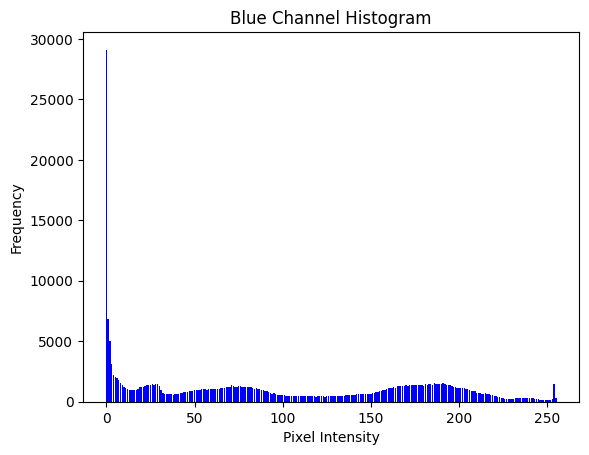

In [25]:
# Load the astronaut image
image = data.astronaut()

# Separate the image into its respective color channels
red_channel = image[:, :, 0]
green_channel = image[:, :, 1]
blue_channel = image[:, :, 2]

# Compute the histograms for each color channel
hist_red, bins_red = exposure.histogram(red_channel, nbins=256)
hist_green, bins_green = exposure.histogram(green_channel, nbins=256)
hist_blue, bins_blue = exposure.histogram(blue_channel, nbins=256)

# Plot the histograms for each color channel

plt.bar(bins_red, hist_red, width=0.8, color='red')
plt.title('Red Channel Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()


plt.bar(bins_green, hist_green, width=0.8, color='green')
plt.title('Green Channel Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()


plt.bar(bins_blue, hist_blue, width=0.8, color='blue')
plt.title('Blue Channel Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

### **Exercise: Histogram Equalization**

*   Read 'aquatermi_lowcontrast.jpg' image from the images folder.
*   Compute the histogram of the image.
*   Perform histogram equalization of the image to enhance the contrast. *Hint: Use equalize_hist function available in skimage.exposure*
*   Also compute histogram of the equalized image.
*   Use 2 x 2 subplot to show the original image and the enhanced image along with the corresponding histograms.



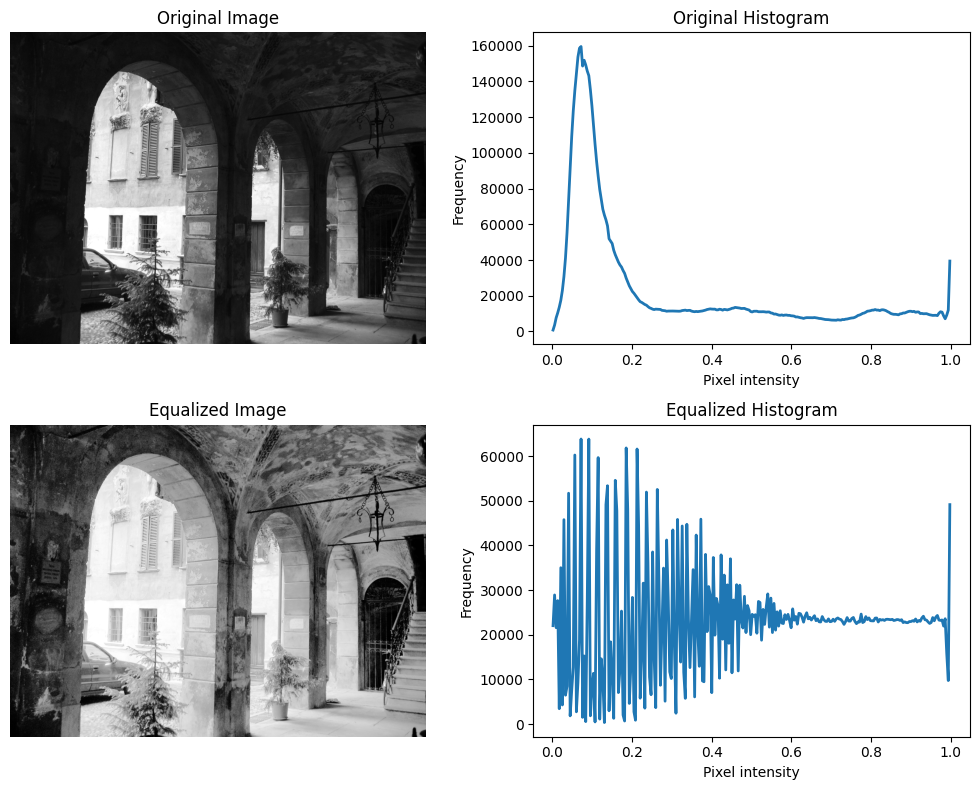

In [1]:
import matplotlib.pyplot as plt
from skimage import io, exposure

# Load the image
image = io.imread('images/aquatermi_lowcontrast.jpg', as_gray=True)

# Compute the histogram of the original image
hist_orig, bins_orig = exposure.histogram(image)

# Perform histogram equalization
image_equalized = exposure.equalize_hist(image)

# Compute the histogram of the equalized image
hist_eq, bins_eq = exposure.histogram(image_equalized)

# Plot the original image and histogram
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title("Original Image")

plt.subplot(2, 2, 2)
plt.plot(bins_orig, hist_orig, lw=2)
plt.title("Original Histogram")
plt.xlabel("Pixel intensity")
plt.ylabel("Frequency")

# Plot the equalized image and histogram
plt.subplot(2, 2, 3)
plt.imshow(image_equalized, cmap='gray')
plt.axis('off')
plt.title("Equalized Image")

plt.subplot(2, 2, 4)
plt.plot(bins_eq, hist_eq, lw=2)
plt.title("Equalized Histogram")
plt.xlabel("Pixel intensity")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()




*   The above function in skimage.exposure uses cdf and interpolation technique to normalize the histogram. How is it different from linear contrast stretch?


**Solution**

Histogram Equalization spreads out the pixel intensity of the image, increasing the ability to differenciate areas of the image

Linear Contrast Stretching simply scales the pixel values to the full intensity range without altering the overall shape of the histogram.

...

### **Exercise: Linear Contrast Stretch**

*   Write a function to compute the linear contrast stretch (Do not use an inbuilt function). 
*   Provide grayscale image array and bin count as parameters to the function and return the enhanced image array.
*   Use a 2 x 2 plot to visualize the original image, histogram, enhanced image and the corresponding histogram.



In [26]:
import numpy as np
import matplotlib.pyplot as plt

def linear_contrast_stretch(image, bins=256):
    # Compute histogram
    hist, _ = np.histogram(image.flatten(), bins=bins, range=(0, 256))
    
    # Compute cumulative histogram
    cdf = hist.cumsum()
    
    # Normalize CDF
    cdf_normalized = cdf / float(cdf.max())
    
    # Linear contrast stretch
    min_val = np.where(cdf_normalized > 0)[0][0]
    max_val = np.where(cdf_normalized >= 1)[0][0]
    stretched_image = (image - min_val) * (255.0 / (max_val - min_val))
    
    # Clip pixel values to [0, 255]
    stretched_image = np.clip(stretched_image, 0, 255)
    
    return stretched_image.astype(np.uint8)

def plot_image_and_hist(image, bins=256):
    plt.figure(figsize=(10, 8))
    
    # Plot original image
    plt.subplot(2, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.title("Original Image")
    
    # Plot original histogram
    plt.subplot(2, 2, 2)
    hist_orig, _ = np.histogram(image.flatten(), bins=bins, range=(0, 256))
    plt.plot(hist_orig, color='black')
    plt.title("Original Histogram")
    plt.xlabel("Pixel intensity")
    plt.ylabel("Frequency")
    
    # Compute and plot enhanced image and histogram
    enhanced_image = linear_contrast_stretch(image, bins)
    plt.subplot(2, 2, 3)
    plt.imshow(enhanced_image, cmap='gray')
    plt.axis('off')
    plt.title("Enhanced Image")
    
    plt.subplot(2, 2, 4)
    hist_enhanced, _ = np.histogram(enhanced_image.flatten(), bins=bins, range=(0, 256))
    plt.plot(hist_enhanced, color='black')
    plt.title("Enhanced Histogram")
    plt.xlabel("Pixel intensity")
    plt.ylabel("Frequency")
    
    plt.tight_layout()
    plt.show()

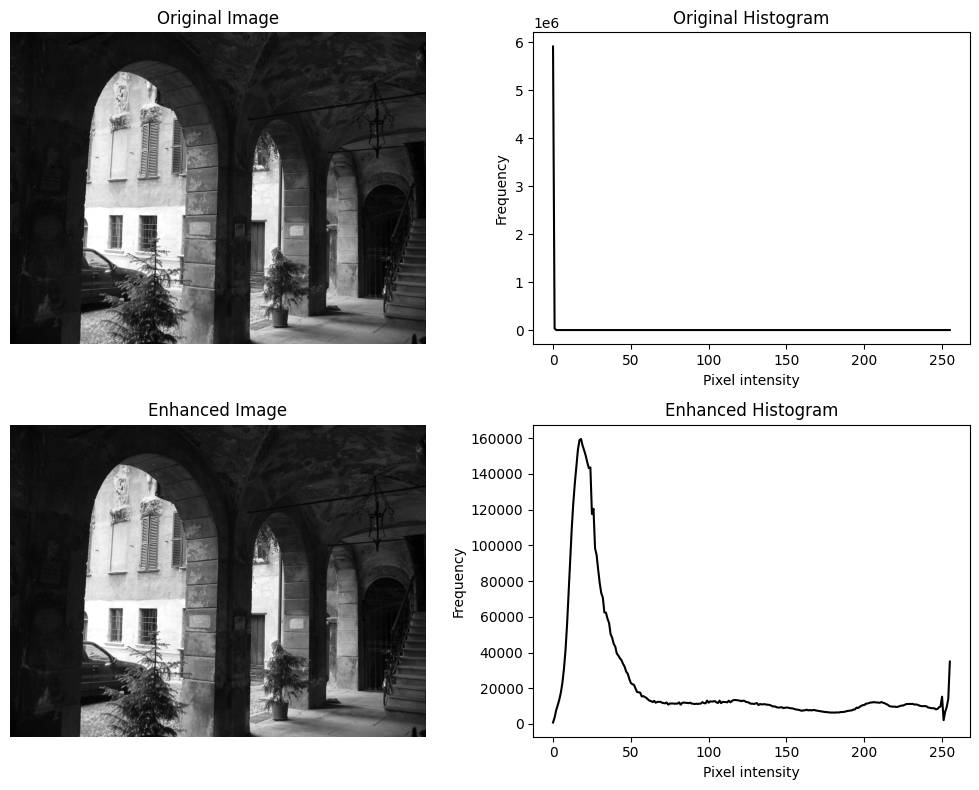

In [27]:
image = io.imread('images/aquatermi_lowcontrast.jpg', as_gray=True)

plot_image_and_hist(image)

# Filters

### **Exercise: Mean Filter**

*   Load the **coins** image from the data module.
*   Define a disk structuring element (selem) of radius 20. *Hint: Structuring elements are defined in the skimage.morphology module*
*   Use mean filter using the created selem. *Hint: The mean filter is available in skimage.filters.rank module*
*   Increase the radius of the selem by 10 and apply the mean filter.
*   Reduce the radius of the selem by 10 and apply the mean filter.
*   Visualize all the smoothened images along with the original image.




Text(0.5, 1.0, 'Mean Filter (Radius 20)')

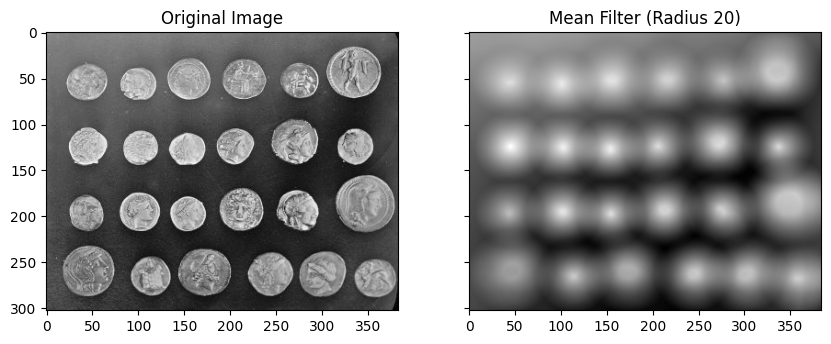

In [28]:
from skimage import data, filters, morphology

# Load the coins image
coins = data.coins()
# Define disk structuring elements of radius 20 
selem_20 = morphology.disk(20)
# Apply mean filter using the created selem
smoothed_20 = filters.rank.mean(coins, footprint=selem_20)
# Visualize the original and smoothed images
fig, axes = plt.subplots(1, 2, figsize=(10, 10), sharex=True, sharey=True)
ax = axes.ravel()
ax[0].imshow(coins, cmap=plt.cm.gray)
ax[0].set_title('Original Image')
ax[1].imshow(smoothed_20, cmap=plt.cm.gray)
ax[1].set_title('Mean Filter (Radius 20)')

Text(0.5, 1.0, 'Mean Filter (Radius 30)')

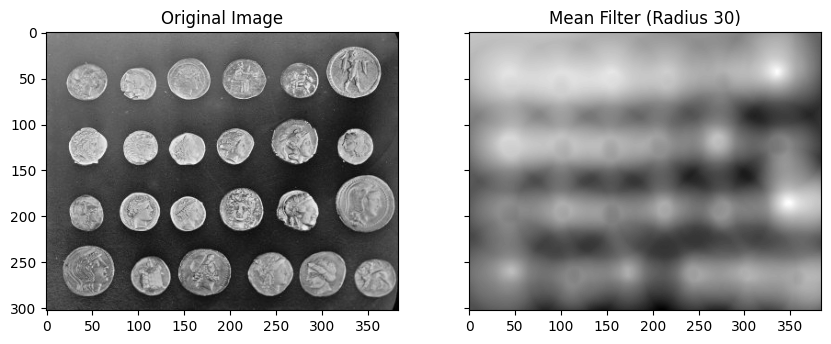

In [29]:
#*   Increase the radius of the selem by 10 and apply the mean filter.
selem_30 = morphology.disk(30)
smoothed_30 = filters.rank.mean(coins, footprint=selem_30)
fig, axes = plt.subplots(1, 2, figsize=(10, 10), sharex=True, sharey=True)
ax = axes.ravel()
ax[0].imshow(coins, cmap=plt.cm.gray)
ax[0].set_title('Original Image')
ax[1].imshow(smoothed_30, cmap=plt.cm.gray)
ax[1].set_title('Mean Filter (Radius 30)')

Text(0.5, 1.0, 'Mean Filter (Radius 10)')

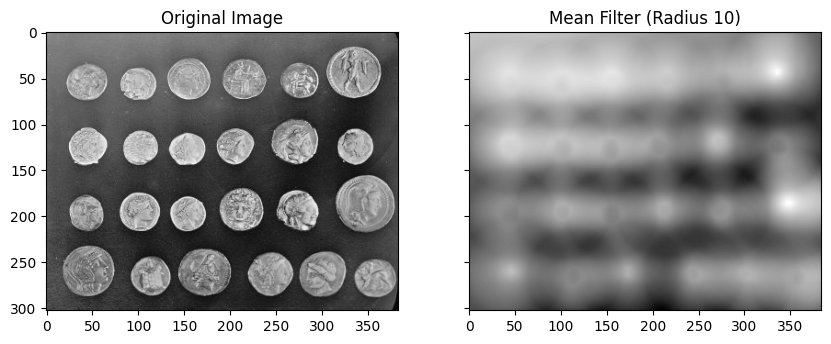

In [30]:
# Reduce the radius of the selem by 10 and apply the mean filter.
selem_10 = morphology.disk(10)
smoothed_10 = filters.rank.mean(coins, footprint=selem_30)
fig, axes = plt.subplots(1, 2, figsize=(10, 10), sharex=True, sharey=True)
ax = axes.ravel()
ax[0].imshow(coins, cmap=plt.cm.gray)
ax[0].set_title('Original Image')
ax[1].imshow(smoothed_10, cmap=plt.cm.gray)
ax[1].set_title('Mean Filter (Radius 10)')

*   Use different selem (square, rectangle, star, diamond) to view the behaviour of the mean filter (It is not necessary to repeat with different sizes; it is sufficient to show the one with optimal parameter).
*   Create a 2 x n subplot to show the selem in the first row and the corresponding smoothened image in the second row.

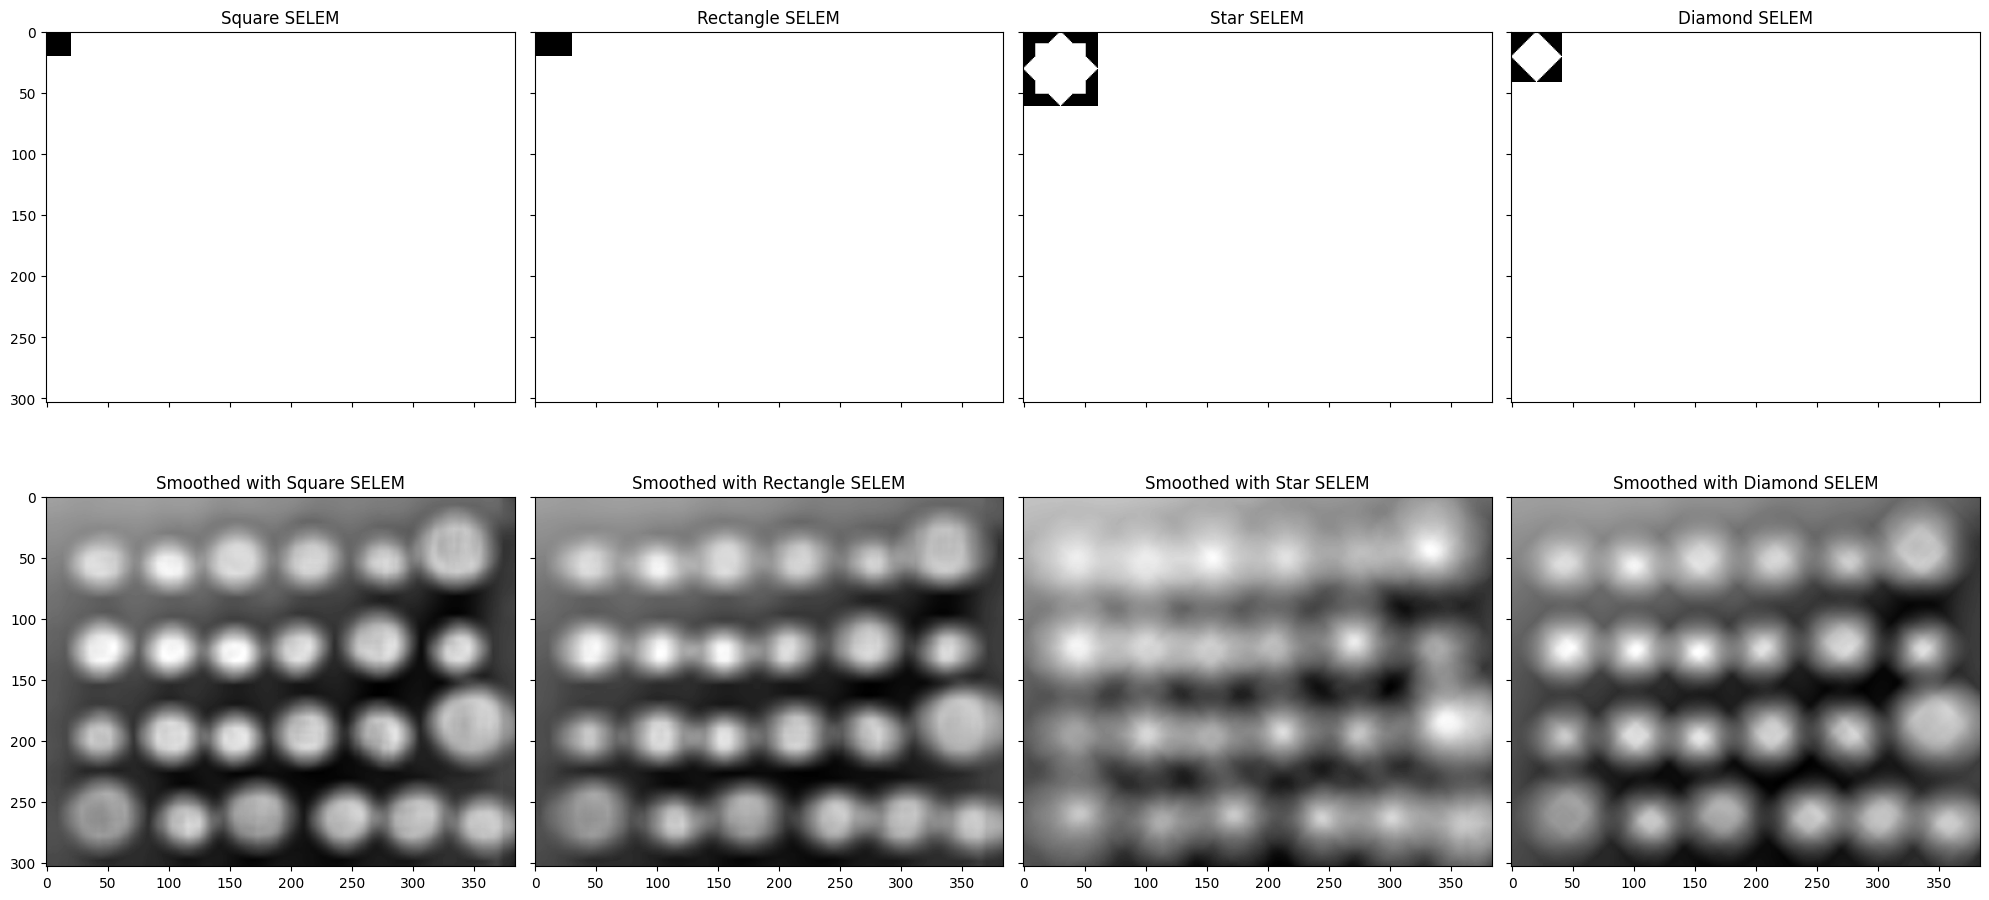

In [31]:
# Define different structuring elements
selem_square = morphology.square(20)
selem_rectangle = morphology.rectangle(20, 30)
selem_star = morphology.star(20)
selem_diamond = morphology.diamond(20)

# Apply mean filter using the created structuring elements
smoothed_square = filters.rank.mean(coins, selem_square)
smoothed_rectangle = filters.rank.mean(coins, selem_rectangle)
smoothed_star = filters.rank.mean(coins, selem_star)
smoothed_diamond = filters.rank.mean(coins, selem_diamond)
# Create a 2x4 subplot to show the selem and the corresponding smoothened image
fig, axes = plt.subplots(2, 4, figsize=(20, 10), sharex=True, sharey=True)
ax = axes.ravel()

# Plot structuring elements
ax[0].imshow(selem_square, cmap=plt.cm.gray)
ax[0].set_title('Square SELEM')

ax[1].imshow(selem_rectangle, cmap=plt.cm.gray)
ax[1].set_title('Rectangle SELEM')

ax[2].imshow(selem_star, cmap=plt.cm.gray)
ax[2].set_title('Star SELEM')

ax[3].imshow(selem_diamond, cmap=plt.cm.gray)
ax[3].set_title('Diamond SELEM')

# Plot smoothed images
ax[4].imshow(smoothed_square, cmap=plt.cm.gray)
ax[4].set_title('Smoothed with Square SELEM')

ax[5].imshow(smoothed_rectangle, cmap=plt.cm.gray)
ax[5].set_title('Smoothed with Rectangle SELEM')

ax[6].imshow(smoothed_star, cmap=plt.cm.gray)
ax[6].set_title('Smoothed with Star SELEM')

ax[7].imshow(smoothed_diamond, cmap=plt.cm.gray)
ax[7].set_title('Smoothed with Diamond SELEM')

plt.tight_layout()
plt.show()

*   How does changing the radius of disk affect the smoothing functionality?

**Solution**

larger raddius and leads to more blurring. The sharp eddges are smoothed out. 

...


*   What is the observed behaviour with difference in the structuring element?



**Solution**

Different shapes inpact the look of the end blur and how much blur is done since the shapes have different sizes

...



*   What is the difference between mean filter and gaussian filter?
*   Where do you use mean filters and where do you use gaussian filters?



**Solution**

Mean filter is commonly used for basic noise redduction and smoothing process where edge preservation is not crutial.
Gaussian filter is better at preserving edges, and used for applications requiring high-quality of noise reduction and preprocessing before further image analysis. 

...